In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


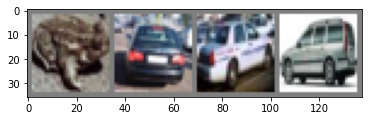

 frog   car   car   car


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
from models.net import Net
net = Net().to(device)

In [5]:
# import os
save_path = './checkpoints/full_train.pth'
# if os.path.exists(save_path):
#     net.load_state_dict(torch.load(save_path))

In [6]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam (net.parameters (), weight_decay = 5e-4)
# optimizer = optim.SGD (net.parameters (), lr = 0.1, momentum = 0.9, weight_decay = 5e-4)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=range(20, 200, 10), gamma=0.5) 

In [ ]:
from utils import utils

for epoch in range(200):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
    scheduler.step()
    train_loss = running_loss / len(trainloader)
    test_accuracy = utils.test(net, testloader, device)
    print(f'epoch: {epoch + 1}, loss: {train_loss}, accuracy {test_accuracy}')

print('Finished Training')

epoch: 1, loss: 0.8951170958216538, accuracy 0.7578
epoch: 2, loss: 0.5972912814611059, accuracy 0.784
epoch: 3, loss: 0.49221510426772525, accuracy 0.7938
epoch: 4, loss: 0.4291069910806768, accuracy 0.7983
epoch: 5, loss: 0.36848236117369076, accuracy 0.8022
epoch: 6, loss: 0.32699572556006634, accuracy 0.8027
epoch: 7, loss: 0.2890654266299799, accuracy 0.7938
epoch: 8, loss: 0.2575039800513736, accuracy 0.8023
epoch: 9, loss: 0.2320301822574852, accuracy 0.792


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [ ]:
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
torch.save(net.state_dict(), save_path)